## Artículo 01

### The NumPy array: a structure for efficient numerical computation

Van Der Walt, S., Colbert, S. C., &amp; Varoquaux, G. (2011). The NumPy array: A
structure for efficient numerical computation. Computing in Science and
Engineering, 13(2), 22-30. https://doi.org/10.1109/MCSE.2011.37

https://www.researchgate.net/publication/224223550_The_NumPy_Array_A_Structure_for_Efficient_Numerical_Computation

En este artículo se presenta la estructura *ndarray* de NumPy, y se hace un estudio sobre su uso y cómo mejora el rendimiento de ciertas operaciones matemáticas para la computación numérica.

Se hace una breve introducción al *Broadcasting* como técnica que usa NumPy para realizar operaciones artiméticas sobre dos o más arrays con distintas dimensiones. 

- Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

También se introduce el trabajo con ficheros usando memoria mapeada.

- Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.

## <center> Actividad 01.01</center>
--- 

El uso del *Broadcasting* en Numpy y ayuda a realizar operaciones aritméticas entre matrices de distintas dimensiones. Esto resulta muy útil cuando se quiere **realizar cualquier operación sobre un escalar o sobre una matriz cuya dimensión sea un subconjunto válido de la anterior**. ¿Qué entendemos por un subconjunto válido?

Numpy presenta la regla del *Broadcasting*. Esta regla limita el uso de esta operación entre *ndarrays* de la siguiente manera:

- La operación se realiza con un escalar (dimensión 1)
- La operación se realiza entre dos matrizes cuyas dimensiones (calculadas de atrás hacia delante) son iguales:

Para exponer de manera más clara esta segunda regla vamos a imaginar dos matrices A y B. 

    Dimensión de A = (Ai, Aj, Ak)
    Dimensión de B = (Bi, Bj)

Para que *Numpy* pueda aplicar *Broadcasting* a una operación entre estas dos matrices se debe cumplir lo que: 
    
    Ak = Bj
    Aj = Bi

Dentro de esta segunda regla estarían incluidas las operaciones entre matrices cuya ultima dimensión sea igual a a la dimensión del vector con el que operan. Sea una matriz A y un vector v

    Dimensión de A = (Ai, Aj, Ak)
    Dimensión de v = vi

Se debe cumplir que:

    Ak = vi

Pasemos a presentar ejemplos:


### Caso válido 1: operación con un escalar

![Matriz por escalar](https://2.bp.blogspot.com/-Baqf02hjMUY/VvV0BNH3-mI/AAAAAAAABQo/y_VLwo57700CWgsiFK3_USKU0x9gyx2Ow/s280/multiplicar-una-matriz-por-un-escalar-en%2Bjava.jpg)

In [ ]:
import numpy as np

A = np.arange(9).reshape(3, 3)          # Matriz de dimensiones 3x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

b = 5                                   # Escalar
print('\nEscalar b =', b)


print('\nBroadcast válido, operacion de Matriz con escalar\n\n', A, '*', b, '=\n\n', A*b)

Cualquier tipo de dimensión sería valida para operar junto a un escalar:

In [ ]:
A = np.arange(24).reshape(3, 2, 4)      # Matriz de dimensiones 3x2x4
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

b = 5                                   # Escalar
print('\nEscalar b =', b)


print('\nBroadcast válido, operacion de Matriz con escalar\n\n', A, '*', b, '=\n\n', A*b)

### Caso válido 2: operación con matriz de dimensiones válidas

![Matriz por matriz](https://numpy.org/devdocs/_images/theory.broadcast_2.gif)

**Matriz y vector**

In [ ]:
### Matriz y vector ###

A = np.arange(10).reshape(2, 5)         # Matriz de dimensiones 2x5
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

v = np.arange(5)                        # Vector de dimension (5)
print('\nVector v =', v)
print('\nDimensiones de v:', v.shape)


print('\nBroadcast válido, operacion de Matriz con vector\n\n', A, '*', v, '=\n\n', A*v) # Operación válida

**Matriz y matriz de dimensiones válidas**

In [ ]:
### Matriz y matriz de dimensiones válidas ###

A = np.arange(30).reshape(2, 5, 3)      # Matriz de dimensiones 2x5x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

B = np.arange(15).reshape(5, 3)         # Matriz de dimensiones 5x3
print('\nMatriz B =', B)
print('\nDimensiones de B:', B.shape)

# Vamos a definir una función que toma dos matrizes y comprueba que sus dimensiones últimas son iguales:
# Esta función basicamente compara las dimensiones de las dos matrices de atras hacia delante usando slicing. 
# Usa el numero de dimensiones (1, 2 o 3) de la menor matriz como límite

def broadcastable_matrixes(A, B):
    if (len(A.shape) > len(B.shape)):
        return B.shape[-len(B.shape):] == A.shape[-len(B.shape):]
    else:
        return B.shape[-len(A.shape):] == A.shape[-len(A.shape):]


# Comprobamos que las dimensiones últimas de las dos matrices son iguales

print('\nLas matrices son broadcastable?:')
print(broadcastable_matrixes(A, B))


print('\nBroadcast válido, operacion de Matriz con Matriz subconjunto válido\n\n', A, '*\n\n', B, '=\n\n', A*B) # Operación válida

### Caso no válido 1: Matriz y vector de dimensiones NO válidas

Se expone a continuación un ejemplo donde una matriz y un vector no son Broadcastable. No tienen dimensiones válidas

![Matriz por matriz](https://numpy.org/devdocs/_images/theory.broadcast_3.gif)

In [ ]:
### Matriz y vector no válido ###

A = np.arange(10).reshape(2, 5)         # Matriz de dimensiones 2x5
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

v = np.arange(3)                        # Vector de dimension (3)
print('\nVector v =', v)
print('\nDimensiones de v:', v.shape)

# Operación no válida: ValueError: operands could not be broadcast together with shapes (2,5) (3,)
print('\nBroadcast válido, operacion de Matriz con vector\n\n', A, '*', v, '=\n\n', A*v) 

### Caso no válido 2: Matriz y matriz de dimensiones NO válidas

Se expone a continuación ejemplos donde una matriz y otra matriz no son Broadcastable. No tienen dimensiones válidas

In [ ]:
### Matriz y matriz de dimensiones no válidas ###

A = np.arange(30).reshape(2, 5, 3)      # Matriz de dimensiones 2x5x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

B = np.arange(15).reshape(3, 5)         # Matriz de dimensiones 3x5
print('\nMatriz B =', B)
print('\nDimensiones de B:', B.shape)

# Comprobamos que las dimensiones últimas de las dos matrices son iguales

print('\nLas matrices son broadcastable?:')
print(broadcastable_matrixes(A, B))

 # Operación no válida: ValueError: operands could not be broadcast together with shapes (2,5,3) (3,5)
print('\nBroadcast válido, operacion de Matriz con Matriz subconjunto válido\n\n', A, '*\n\n', B, '=\n\n', A*B) # Operación válida

## <center> Actividad 01.02</center>
--- 

### Eficacia sobre ndarrays de tamaños grandes

Podemos comprobar en este sencillo código como unas lecturas sobre *ndarrays* en memoria mapeada mejora considerablemente.

Se consideran dos arrays que contienen el tamaño del *ndarray* que será visualizado

zarr da un mejor resultado

1.5806198120117188
iter: 0 Time (ms): 1.580620
0.5377769470214844
iter: 1 Time (ms): 0.537777
3.9073944091796875
iter: 2 Time (ms): 3.907394
28.345823287963867
iter: 3 Time (ms): 28.345823
169.40202713012695
iter: 4 Time (ms): 169.402027
535.6314182281494
iter: 5 Time (ms): 535.631418
iter: 0 Time (ms): 10.735416
iter: 1 Time (ms): 0.335217
iter: 2 Time (ms): 1.405954
iter: 3 Time (ms): 17.006779
iter: 4 Time (ms): 19.748163
iter: 5 Time (ms): 39.995575
iter: 0 Time (ms): 29.473448
iter: 1 Time (ms): 30.405998
iter: 2 Time (ms): 29.325628
iter: 3 Time (ms): 40.743017
iter: 4 Time (ms): 34.616423
iter: 5 Time (ms): 31.830406


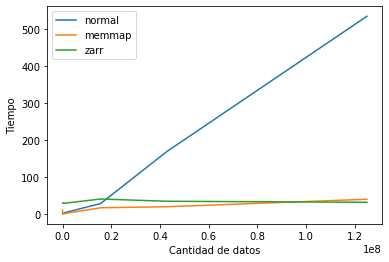

In [9]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import zarr

### NORMAL
#a1 = np.arange(1000000).reshape(100, 100, 100)

#save('/tmp/myarray1.npy', array1)

#a1 = load('/tmp/myarray1.npy')


### MEMMAP
#a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(100, 100, 100))
#a2.flat = np.arange(1000000)
#a2.flush()

cantidad_datos = np.array([1000, 125000, 1000000, 15625000, 42875000, 125000000]) #valores cuyas raices cubicas sean enteros para poder formar ndarrays de 3 dimensiones
tiempo1 = np.zeros([6])
tiempo2 = np.zeros([6])

tiempo3 = np.zeros([6])

for iter in range(6):
    cantidad = cantidad_datos[iter]
    cantidad_por_axis = int(cantidad**(1/3)) + 1
    a1 = np.arange(cantidad).reshape(cantidad_por_axis, cantidad_por_axis, cantidad_por_axis)
    
    t1 = time()
    for i in range(5):
        view = np.array(a1[::, ::, ::])
    t1 = ((time() - t1) / 5) * 1000
    tiempo1[iter] = t1
    print(tiempo1[iter])
    print ('iter:', iter, 'Time (ms): %f' % t1)

for iter in range(6):
    cantidad = cantidad_datos[iter]
    cantidad_por_axis = int(cantidad**(1/3)) + 1
    a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(cantidad_por_axis, cantidad_por_axis, cantidad_por_axis))

    t2 = time() 
    for i in range(5):
        view = np.array(a2[::, ::, ::])
    t2 = ((time() - t2) / 5) * 1000
    tiempo2[iter] = t2
    print ('iter:', iter, 'Time (ms): %f' % t2)



for iter in range(6):
    cantidad = cantidad_datos[iter]
    cantidad_por_axis = int(cantidad**(1/3)) + 1
    c_amitad = cantidad_por_axis/2
    a4 = zarr.open('/tmp/myarray4.zarr', mode='a', shape=(cantidad_por_axis, cantidad_por_axis, cantidad_por_axis), chunks=(c_amitad, c_amitad, c_amitad))        

    t3 = time() 
    for i in range(5):
        view = np.array(a2[::, ::, ::])
    t3 = ((time() - t3) / 5) * 1000
    tiempo3[iter] = t3
    print ('iter:', iter, 'Time (ms): %f' % t3)



plt.plot(cantidad_datos, tiempo1, label="normal")

plt.plot(cantidad_datos, tiempo2, label="memmap")

plt.plot(cantidad_datos, tiempo3, label="zarr")

plt.ylabel('Tiempo')
plt.xlabel('Cantidad de datos')

plt.legend(loc="upper left")


#plt.plot(tiempo2)
plt.show()



In [20]:
import numpy as np
from time import time
import os
import pathlib
from tempfile import TemporaryFile
from numpy import load
from numpy import save
import h5py, zarr

### NORMAL
a1 = np.arange(1000000).reshape(100, 100, 100)

#save('/tmp/myarray1.npy', array1)

#a1 = load('/tmp/myarray1.npy')


### MEMMAP
a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(1000, 1000, 1000))

# a2.flat = np.arange(1000000000)

# a2.flush()

### HDF5
a3 = np.random.random((100, 100, 100))

with h5py.File('test.hdf', 'w') as outfile:
    dset = outfile.create_dataset('a_descriptive_name', data=a3, chunks=True)
    dset.attrs['some key'] = 'Did you want some metadata?'


### Zarr
a4 = zarr.open('/tmp/myarray4.zarr', mode='a', shape=(1000, 1000, 1000), chunks=(500, 500, 500))


t1 = time()
for i in range(5):
    view = np.array(a1[::10, ::10, ::10])
t1 = ((time() - t1) / 5) * 1000
print ('Time (ms): %f' % t1)

t2 = time()
for i in range(5):
    view = np.array(a2[::10, ::10, ::10])
t2 = ((time() - t2) / 5) * 1000
print ('Time (ms): %f' % t2)

t3 = time()
for i in range(5):
    view = np.array(a3[::10, ::10, ::10])
t3 = ((time() - t3) / 5) * 1000
print ('Time (ms): %f' % t3)

t4 = time()
for i in range(5):
    view = np.array(a4[::10, ::10, ::10])
t4 = ((time() - t4) / 5) * 1000
print ('Time (ms): %f' % t4)



Time (ms): 0.031185
Time (ms): 8.098221
Time (ms): 0.079775
Time (ms): 5.010986


In [2]:
import numpy as np
from time import time
import os
import pathlib


file_path = os.path.join(pathlib.Path().absolute(),  'test1.dat') 
FILE = open(file_path, "wb")

array = np.arange(1000000000).reshape(1000, 1000, 1000)

FILE.write(array)

t = time()
for i in range(5):
    view = np.array(array[::16, ::16])
t = ((time() - t) / 5) * 1000
print ('Time (ms): %i' % t)



Time (ms): 25


In [1]:
import h5py
h5py.run_tests()

0

## Artículo 02

### Data Structures for Statistical Computing in Python

McKinney, W. (2010). Data Structures for Statistical Computing in Python.
Proceedings of the 9th Python in Science Conference, December, 56-61.
https://doi.org/10.25080/majora-92bf1922-00a

https://www.researchgate.net/publication/265001241_Data_Structures_for_Statistical_Computing_in_Python

En este segundo artículo el creador de *pandas* introduce dicha librería en comparación con las estructuras nativas de R.

- Actividad 02.01 - Desarrollar una opinión razonada del estado actual de las herramientas de análisis de datos estadísticos en contraposición a como se muestran en el artículo, R vs Python vs SQL vs Others...

## <center> Actividad 02.01</center>
--- 

## Bibliografía
[Numpy, Broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)